<a href="https://colab.research.google.com/github/Eneyire/Eneyire/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification Using CNNs and PyTorch: Identifying Document Types

In this project, I developed a neural network model that classifies images into categories such as social security cards, driving licenses, and others. I used PyTorch to build the model, leveraging its unique feature of dynamic computational graphs, which sets it apart from other deep learning frameworks.

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
ROOT_DIR = "gdrive/My Drive/Datasets/CNN/"

In [3]:
#Importing Necessary files to read Images
import pandas as pd
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [4]:
# Printing random images from the dataset
Training_folder= ROOT_DIR + "Data/Training_data"
os.listdir(Training_folder)


['others', 'social_security', 'driving_license']

In [5]:
from torchvision.datasets import ImageFolder
ImageFolder(Training_folder)

Dataset ImageFolder
    Number of datapoints: 600
    Root location: gdrive/My Drive/Datasets/CNN/Data/Training_data

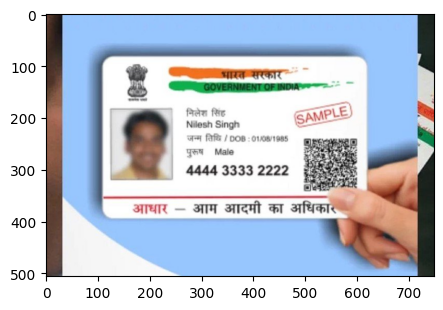

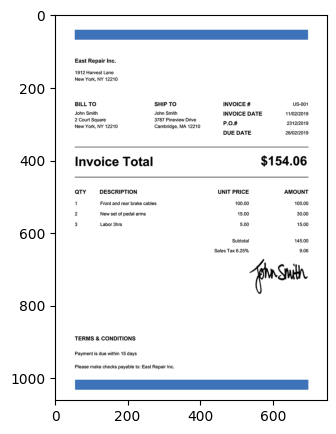

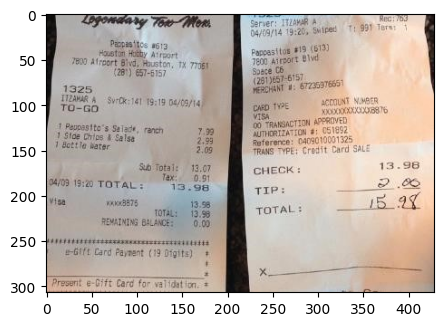

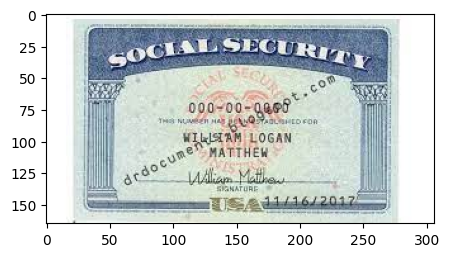

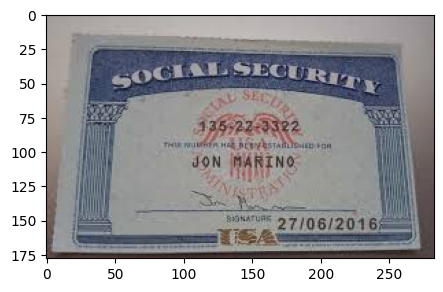

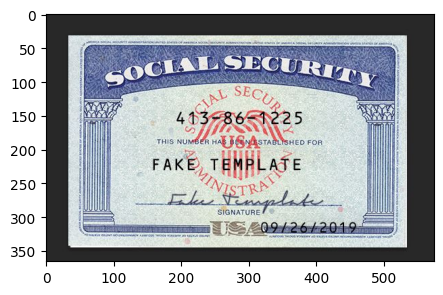

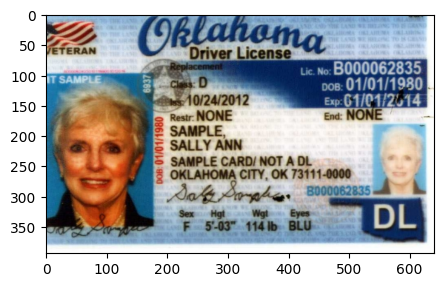

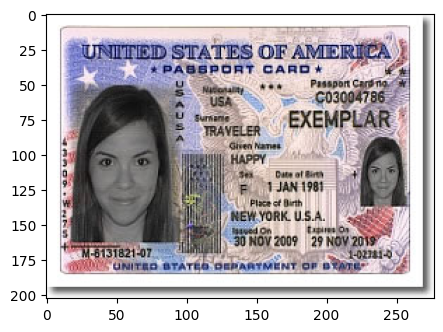

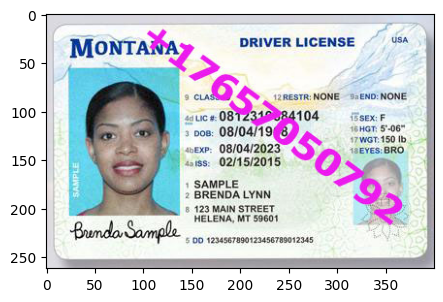

In [6]:
for path in os.listdir(Training_folder):
    for i in range(3):
        temp_path = Training_folder + "/" + path # Creating a temp path to work on images
        file = random.choice(os.listdir(temp_path)) # Randomly selecting an image from the temp pathb and saving them into a file
        image_path= os.path.join(temp_path, file) # Joining the file into the temp path folder and assigning it as the image path
        img = mpimg.imread(image_path)
        plt.figure(figsize=(5,5))
        plt.imshow(img)


In [7]:
#Setting the Image dimension and source folder for loading the dataset
IMG_WIDTH = 200
IMG_HEIGHT = 200
Train_folder = ROOT_DIR + 'Data/Training_data'
Test_folder = ROOT_DIR + 'Data/Testing_data'

In [8]:
#Creating the image data and the labels from the images
def create_dataset(Train_folder):
    img_data_array = []
    class_name = []
    classes = {'driving_license': [1,0,0], 'others': [0,1,0], 'social_security': [0,0,1]}
    for PATH in os.listdir(Train_folder):
        for file in os.listdir(os.path.join(Train_folder, PATH)):
            image_path= os.path.join(Train_folder, PATH,  file)
            image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float64')
            # image /= 255
            if len(image.shape) == 3:
                img_data_array.append(np.array(image).reshape([3, 200, 200]))
                class_name.append(classes[PATH])
    return img_data_array, class_name

In [9]:
# extract the image array and class name for training data
Train_img_data, train_class_name = create_dataset(Train_folder)

# extract the image array and class name for testing data
Test_img_data, test_class_name = create_dataset(Test_folder)
len(Train_img_data)

597

In [10]:
train_class_name[0]

[0, 1, 0]

In [11]:
# Implementing a CNN in PyTorch
# importing necessary libraries
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import torch.utils.data as Data
from torch import Tensor
from torch.autograd import Variable

In [12]:
# version of pytorch
print(torch.__version__)

2.5.1+cu121


In [13]:
torch_dataset_train = Data.TensorDataset(Tensor(np.array(Train_img_data)), Tensor(np.array(train_class_name)))
torch_dataset_test = Data.TensorDataset(Tensor(np.array(Test_img_data)), Tensor(np.array(test_class_name)))

In [14]:
# Defining trainloader and test loader
trainloader = torch.utils.data.DataLoader(torch_dataset_train, batch_size= 8, shuffle = True) # DataLoader is an iterator that iterates the iamges in batches for the model
testloader = torch.utils.data.DataLoader(torch_dataset_test, batch_size= 8, shuffle = True)


In [15]:
torch_dataset_train = Data.TensorDataset(Tensor(np.array(Train_img_data)), Tensor(np.array(train_class_name)))
torch_dataset_test = Data.TensorDataset(Tensor(np.array(Test_img_data)), Tensor(np.array(test_class_name)))

In [16]:
# shape of training data
dataiter = iter(trainloader)
images = next(dataiter)
images[0].shape

torch.Size([8, 3, 200, 200])

In [17]:
# defining the model architecture
class CNNNet(nn.Module):
  def __init__(self):
      super(CNNNet, self).__init__()

      self.cnn_layers = nn.Sequential(
          # Defining a 2D convolution layer
          nn.Conv2d(3, 16, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2)),
          nn.ReLU(inplace=True),
          nn.MaxPool2d(kernel_size=2, stride=2),
          nn.Conv2d(16, 3, kernel_size=(50, 50), stride=(1, 1)),
          nn.MaxPool2d(kernel_size=1, stride=1, padding=0, ceil_mode=False)
      )

      self.linear_layers = nn.Sequential(
          nn.Linear(3, 3)
      )

  # Defining the forward pass
  def forward(self, x):
      x = self.cnn_layers(x)
      x = x.view(x.size(0), -1)
      x = self.linear_layers(x)
      return x


# Define the optimizer and loss function
# Defining the model
model = CNNNet()

# Defining the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.0001)

# Defining the loss function
criterion = nn.CrossEntropyLoss()

# Checking if GPU is available
print(torch.cuda.is_available())
if torch.cuda.is_available():
    model = model.to("cuda")
    criterion = criterion.to("cuda")

print(model)


False
CNNNet(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 3, kernel_size=(50, 50), stride=(1, 1))
    (4): MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=3, out_features=3, bias=True)
  )
)


In [18]:
!export CUDA_LAUNCH_BLOCKING=1

In [19]:
#train this model for 10 epochs
for i in range(10):

    running_loss = 0
    model.train() # indicator for training phase
    for images, labels in trainloader:

        if torch.cuda.is_available():
          images = images.to("cuda")
          labels = labels.to("cuda")

        # Training pass
        optimizer.zero_grad()

        output = model(images)

        loss = criterion(output, labels)

        #This is where the model learns by backpropagating
        loss.backward()

        #And optimizes its weights here
        optimizer.step()

        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(i+1, running_loss/len(trainloader)))

Epoch 1 - Training loss: 32.03701792995135
Epoch 2 - Training loss: 0.6235107378164927
Epoch 3 - Training loss: 0.43270789573589963
Epoch 4 - Training loss: 0.3570073413848877
Epoch 5 - Training loss: 0.29422898729642233
Epoch 6 - Training loss: 0.25786462422460316
Epoch 7 - Training loss: 0.2166813765466213
Epoch 8 - Training loss: 0.20184352499743302
Epoch 9 - Training loss: 0.19057213423152763
Epoch 10 - Training loss: 0.1639695986111959


In [20]:
# Save the model
filepath = ROOT_DIR + "model.pt"
torch.save(model.state_dict(), filepath)

In [21]:
model_trained = CNNNet()
model_trained.load_state_dict(torch.load(filepath))

<ipython-input-21-c6c30a0c7064>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_trained.load_state_dict(torch.load(filepath))


<All keys matched successfully>

In [22]:
# device = "cuda" # --> use if GPU is present

# [.2, .5, .3]
# y_pred_list = []
# y_true_list = []
# with torch.no_grad():
#     for x_batch, y_batch in testloader:
#         x_batch, y_batch = x_batch.to(device), y_batch.to(device)
#         y_test_pred = model(x_batch)
#         print(y_test_pred)
#         _, y_pred_tag = torch.max(y_test_pred, dim = 1)
#         y_pred_list.extend(y_pred_tag.cpu().numpy())
#         y_true_list.extend(y_batch.cpu().numpy())

In [23]:
#prediction
y_pred_list = []
y_true_list = []
with torch.no_grad():
    for x_batch, y_batch in testloader:
        x_batch, y_batch = x_batch.to(), y_batch.to()
        y_test_pred = model(x_batch)
        print(y_test_pred)
        _, y_pred_tag = torch.max(y_test_pred, dim = 1)
        y_pred_list.extend(y_pred_tag.cpu().numpy())
        y_true_list.extend(y_batch.cpu().numpy())

tensor([[ -3.9902,  -0.7291,   1.1142],
        [  2.3068,   2.0420,  -1.4327],
        [ -1.4908,   0.3451,  -0.2326],
        [ -2.9586,  -2.6246,   0.9648],
        [-17.1038, -11.7642,   3.6122],
        [  9.2841,   2.7503,  -3.1934],
        [ -6.6186,  -4.0337,   1.9290],
        [  1.9334,   4.1659,  -1.6965]])
tensor([[ 4.6936,  0.4896, -1.6261],
        [-2.3010, -2.7039,  1.0729],
        [ 3.8166, -0.1909, -1.8328],
        [12.6429,  0.8347, -4.3690],
        [ 0.9710,  1.1326, -0.7731],
        [-2.0100, -1.9118,  0.6348],
        [-6.6186, -4.0337,  1.9290],
        [ 0.4718,  3.1736, -1.0152]])
tensor([[15.0468,  1.8519, -4.5500],
        [ 9.7138,  5.5522, -2.8358],
        [-4.5885, -2.8200,  1.3653],
        [ 8.3846,  4.5325, -3.1497],
        [-0.5579,  2.1965, -0.9808],
        [-0.7215, -0.0487,  0.7050],
        [ 7.6036,  5.0151, -3.0267],
        [ 6.1778,  0.8843, -1.6160]])
tensor([[ 1.1955,  4.0539, -1.4164],
        [ 6.4583,  6.8373, -2.3453],
        [ 7

In [24]:
# y_test
y_true_list_max = [m.argmax() for m in y_true_list]

In [25]:
# Accuracy of model
correct_count, all_count = 0, 0
for i in range(len(y_pred_list)):
    if(y_pred_list[i] == y_true_list_max[i]):
      correct_count += 1
    all_count += 1
print("\nModel Accuracy =", (correct_count/all_count))


Model Accuracy = 0.8926174496644296
